<a href="https://colab.research.google.com/github/claredavies/Image3DCoursework/blob/main/GLCM/GLCM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [94]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.feature import greycomatrix, greycoprops
from skimage import data

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

In [95]:
!pip install python-mnist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [96]:
import fm.utils.mnist_reader as mnist_reader

# Dataset 1

## Read images

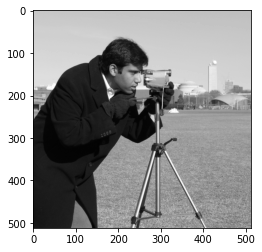

In [97]:
# Load the sample image
image = data.camera()
plt.imshow(image, cmap="gray");

## Get Patches

First, we select a set of patches from the image. We select 4 grass patches and 4 sky patches, and we register them.
Next, there is the code we to select those patches manually and we save them in two independent lists.

Remember, that a patch is an image piece. In our case we have defined it as a square of $21 \times 21$ pixels.

In [81]:
def getGrassPatches(PATCH_SIZE, image):
  grass_locations = [(280, 454), (342, 223), (444, 192), (455, 455)]
  grass_patches = []
  for loc in grass_locations:
      grass_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                                loc[1]:loc[1] + PATCH_SIZE])
  return [grass_patches, grass_locations]

In [82]:
def getSkyPatches(PATCH_SIZE, image):
  sky_locations = [(38, 34), (139, 28), (37, 437), (145, 379)]
  sky_patches = []
  for loc in sky_locations:
      sky_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                              loc[1]:loc[1] + PATCH_SIZE])
  return [sky_patches, sky_locations]

In [83]:
PATCH_SIZE = 21
[grass_patches, grass_locations] = getGrassPatches(PATCH_SIZE, image)
[sky_patches, sky_locations] = getSkyPatches(PATCH_SIZE, image)

## Find GLCM Features

Once we have the patches selected, we can compute the GLCM features.
The computation procedure of this kind of features consists in two steps:
1. Compute the Grey Level Co-occurrence Matrix (la GLCM).
2. Compute the texture properties of the GLCM.

The first step is achieved applying the function [greycomatrix](https://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.graycomatrix) and the second one using [greycoprops](https://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.graycoprops).

In [84]:
# compute some GLCM properties each patch
def calGLCMProperties(grass_patches, sky_patches):
  xs = []
  ys = []
  for patch in (grass_patches + sky_patches):
      glcm = greycomatrix(patch, 
                          distances=[5],
                          angles=[0], # We ignore this
                          levels=256, # Number of possible pixel values
                          symmetric=True, 
                          normed=True)
      xs.append(greycoprops(glcm, 'dissimilarity')[0, 0])
      ys.append(greycoprops(glcm, 'correlation')[0, 0])
  return [xs, ys, glcm]

In [85]:
[xs, ys, glcm] = calGLCMProperties(grass_patches, sky_patches)

In [86]:
glcm.shape

(256, 256, 1, 1)

xs - dissimilarity

In [87]:
xs

[6.044642857142856,
 11.973214285714285,
 18.794642857142858,
 18.80059523809523,
 0.46726190476190477,
 0.5744047619047619,
 0.5208333333333334,
 0.5386904761904763]

ys - correlation

In [88]:
ys

[0.18465981611100118,
 0.09819326975998054,
 0.012329737526846562,
 0.03211156902114874,
 0.6499750949948057,
 0.7303979048396345,
 0.7674139951474309,
 0.5151595753523491]

Next, we can visualise the selected patches and the computed features.

In [91]:
def visualiseSelectedPatchesAndComputedFeatures(xs, ys, PATCH_SIZE, grass_patches, sky_patches):
  # create the figure
  fig = plt.figure(figsize=(8, 8))

  # display original image with locations of patches
  ax = fig.add_subplot(3, 2, 1)
  ax.imshow(image, cmap=plt.cm.gray, vmin=0, vmax=255)
  for (y, x) in grass_locations:
      ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'gs')

  for (y, x) in sky_locations:
      ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'bs')

  ax.set_xlabel('Original Image')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.axis('image')

  # for each patch, plot (dissimilarity, correlation)
  ax = fig.add_subplot(3, 2, 2)
  ax.plot(xs[:len(grass_patches)], ys[:len(grass_patches)], 'go', label='Grass')
  ax.plot(xs[len(grass_patches):], ys[len(grass_patches):], 'bo', label='Sky')
  ax.set_xlabel('GLCM Dissimilarity')
  ax.set_ylabel('GLCM Correlation')
  ax.legend()

  # display the image patches
  for i, patch in enumerate(grass_patches):
      ax = fig.add_subplot(3, len(grass_patches), len(grass_patches)*1 + i + 1)
      ax.imshow(patch, cmap=plt.cm.gray, vmin=0, vmax=255)
      ax.set_xlabel('Grass %d' % (i + 1))

  for i, patch in enumerate(sky_patches):
      ax = fig.add_subplot(3, len(sky_patches), len(sky_patches)*2 + i + 1)
      ax.imshow(patch, cmap=plt.cm.gray, vmin=0, vmax=255)
      ax.set_xlabel('Sky %d' % (i + 1))

  # display the patches and plot
  fig.suptitle('Grey level co-occurrence matrix features', fontsize=14, y=1.05)
  plt.tight_layout()

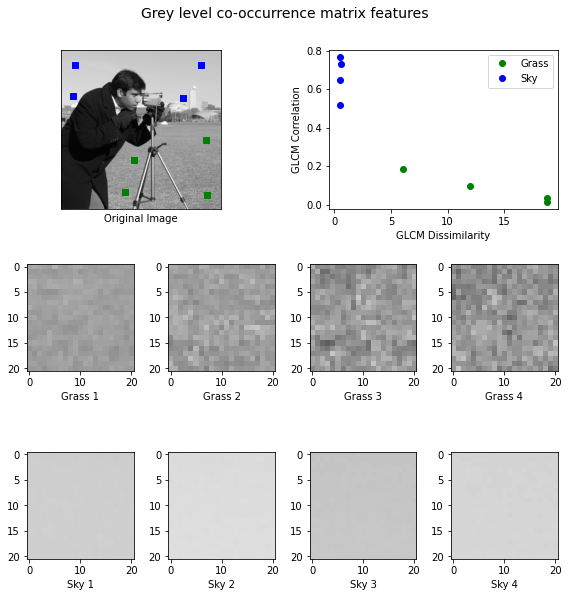

In [92]:
visualiseSelectedPatchesAndComputedFeatures(xs, ys, PATCH_SIZE, grass_patches, sky_patches)

## Classifier

In [ ]:
## Classifier

# Dataset *2*

## Download dataset

In [14]:
!git clone https://github.com/zalandoresearch/fashion-mnist.git fm

Cloning into 'fm'...
remote: Enumerating objects: 762, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 762 (delta 0), reused 3 (delta 0), pack-reused 758
Receiving objects: 100% (762/762), 105.85 MiB | 41.83 MiB/s, done.
Resolving deltas: 100% (444/444), done.


In [19]:
X_train, y_train = mnist_reader.load_mnist('fm/data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('fm/data/fashion', kind='t10k')

In [20]:
X_train.shape

(60000, 784)

In [21]:
image = X_train[0].reshape((28, 28))

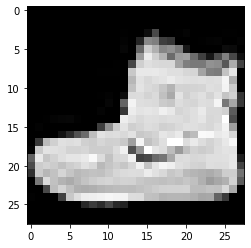

In [22]:
plt.imshow(image, cmap="gray")

## Feature extraction

In [23]:
PATCH_SIZE = int(28 / 4)
PATCH_SIZE

7

In [24]:
patches = []
for y in range(0, image.shape[0] - PATCH_SIZE + 1, PATCH_SIZE):
    for x in range(0, image.shape[1] - PATCH_SIZE + 1, PATCH_SIZE):
        patches.append(image[y:y + PATCH_SIZE, x:x + PATCH_SIZE])

In [25]:
patches[0].shape

(7, 7)

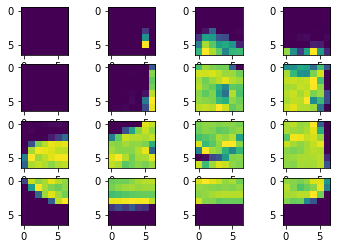

In [26]:
fig, axes = plt.subplots(4, 4)
axes = axes.flatten()

for i, patch in enumerate(patches):
    axes[i].imshow(patch)

plt.show()

In [27]:
# compute some GLCM properties each patch
xs = []
ys = []
for patch in patches:
    glcm = greycomatrix(patch, distances=[5], angles=[0], levels=256, symmetric=True, normed=True)
    xs.append(greycoprops(glcm, 'dissimilarity')[0, 0])
    ys.append(greycoprops(glcm, 'correlation')[0, 0])

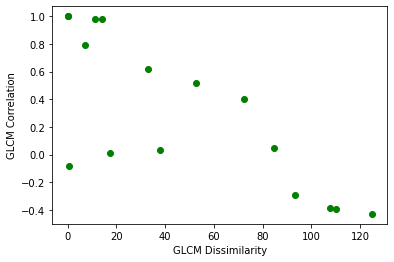

In [28]:
# for each patch, plot (dissimilarity, correlation)
plt.plot(xs[:len(patches)], ys[:len(patches)], 'go')
plt.xlabel('GLCM Dissimilarity')
plt.ylabel('GLCM Correlation')
plt.show()

In [29]:
PATCH_PER_IMAGE = int(28 / PATCH_SIZE) * int(28 / PATCH_SIZE)
PATCH_PER_IMAGE

16

In [41]:
print(xs)

[0.0, 0.7142857142857143, 32.85714285714286, 7.071428571428573, 0.0, 107.85714285714288, 17.42857142857143, 110.0, 72.50000000000001, 93.14285714285717, 37.85714285714286, 124.92857142857144, 84.64285714285715, 14.142857142857146, 11.071428571428571, 52.64285714285715]


## Tasks

Build your own classifier and extract metrics to know how the classifier is working.

Detect with which classes is the classifier working better and worse. Try to explain the reasons.


**HINT:** The confusion matrix can be very helpful.

Useful link: https://towardsdatascience.com/multi-class-classification-extracting-performance-metrics-from-the-confusion-matrix-b379b427a872


In [35]:
# define cnn model
def define_model():
 model = Sequential()
 model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
 model.add(MaxPooling2D((2, 2)))
 model.add(Flatten())
 model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
 model.add(Dense(10, activation='softmax'))
 # compile model
 opt = SGD(learning_rate=0.01, momentum=0.9)
 model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
 return model

In [37]:
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
 scores, histories = list(), list()
 # prepare cross validation
 kfold = KFold(n_folds, shuffle=True, random_state=1)
 # enumerate splits
 for train_ix, test_ix in kfold.split(dataX):
  # define model
  model = define_model()
  # select rows for train and test
  trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
  # fit model
  history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
  # evaluate model
  _, acc = model.evaluate(testX, testY, verbose=0)
  print('> %.3f' % (acc * 100.0))
  # stores scores
  scores.append(acc)
  histories.append(history)
 return scores, histories

In [38]:
def summarize_diagnostics(histories):
 for i in range(len(histories)):
 # plot loss
  plt.subplot(2, 1, 1)
  plt.title('Cross Entropy Loss')
  plt.plot(histories[i].history['loss'], color='blue', label='train')
  plt.plot(histories[i].history['val_loss'], color='orange', label='test')
  # plot accuracy
  plt.subplot(2, 1, 2)
  plt.title('Classification Accuracy')
  plt.plot(histories[i].history['accuracy'], color='blue', label='train')
  plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
  plt.show()

In [39]:
# summarize model performance
def summarize_performance(scores):
 # print summary
 print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
 # box and whisker plots of results
 plt.boxplot(scores)
 plt.show()

In [ ]:
scores, histories = evaluate_model(trainX, trainY)
 # learning curves
 summarize_diagnostics(histories)
 # summarize estimated performance
 summarize_performance(scores)

# Features library

https://github.com/explainingAI/uib_vfeatures


https://pypi.org/project/uib-vfeatures/